In [ ]:
## Modulo Newton-Raphson
## raiz = newtonRaphson(f,df,a,b,tol=1.0e-9).
## Encuentra la raiz de f(x) = 0 combinando Newton-Raphson
## con biseccion. La raiz debe estar en el intervalo (a,b).
## Los usuarios definen f(x) y su derivada df(x).
def err(string):
  print(string)
  input('Press return to exit')
  sys.exit()

def newtonRaphson(f,df,a,b,tol=1.0e-9):
  from numpy import sign
  fa = f(a)
  if fa == 0.0: return a
  fb = f(b)
  if fb == 0.0: return b
  if sign(fa) == sign(fb): err('La raiz no esta en el intervalo')
  x = 0.5*(a + b)
  for i in range(30):
    print(i)
    fx = f(x)
    if fx == 0.0: return x 
    if sign(fa) != sign(fx): b = x # Haz el intervalo mas pequeño
    else: a = x
    dfx = df(x)  
    try: dx = -fx/dfx # Trata un paso con la expresion de Delta x
    except ZeroDivisionError: dx = b - a # Si division diverge, intervalo afuera
    x = x + dx # avanza en x
    if (b - x)*(x - a) < 0.0: # Si el resultado esta fuera, usa biseccion
      dx = 0.5*(b - a)
      x = a + dx 
    if abs(dx) < tol*max(abs(b),1.0): return x # Checa la convergencia y sal
  print('Too many iterations in Newton-Raphson')


In [ ]:
def f(x): return x**2 - 1
def df(x): return 2*x
root = newtonRaphson(f,df,-5.0,0)
print('Root =',root)

In [3]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

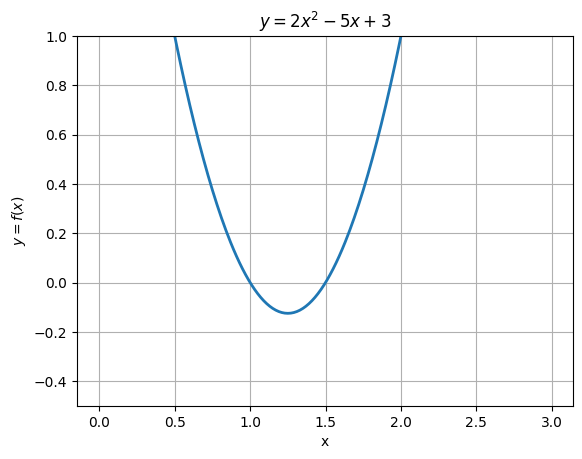

In [4]:
# Graficar funciones
t = np.arange(0.0, 3.0, 0.01)
s = 2*t**2-5*t+3  
line, = plt.plot(t, s, lw=2)


plt.grid(True)
plt.ylim(-0.5, 1)
plt.title("$y=2x^2-5x+3$")
plt.ylabel('$y = f(x)$')
plt.xlabel('x')

In [ ]:
# Metodo de Biseccion Mejorado para el Ejemplo de clase

def y(x):                    # define la funcion y(x)
  y = 2*x**2 - 5*x + 3
  return y

x1 = float(input('Captura el valor de x1: ')) # peticion de valor x1
x2 = float(input('Captura el valor de x2: ')) # peticion de valor x2
y1 = y(x1)                                    # evalua la funcion y(x1)
y2 = y(x2)                                    # evalua la funcion y(x1)

if y1*y2 > 0:                                 # prueba si los signos son iguales
  print('No hay raices en el intervalo')
  exit

for i in range(100):
  xh = (x1+x2)/2
  yh = y(xh)                                  # evalua la funcion y(xh)
  y1 = y(x1)                                  # evalua la funcion y(x1)
  if abs(y1) < 1.0e-6:
    break
  elif y1*yh < 0:
    x2 = xh
  else:
    x1 = xh
print('La raiz es: %.5f' % x1)
print('Numero de bisecciones: %d' % (i+1))

**primera aproximación de diferencias centrales** para $f^{(1)}$.
$$
f'(x) \approx \frac{f (x + h) − f (x − h)}{2h}
$$
**primera aproximación de diferencias forward** para $f^{(1)}$.
$$
f'(x) \approx \frac{f(x+h) - f(x)}{h}
$$
**primera aproximación de diferencias backwards** para $f^{(1)}$.
$$
f'(x) \approx \frac{f (x) − f (x − h)}{h}
$$


In [ ]:
#Diferencias finitas
from math import *

def f(x,n): #La función a derivar con n decimales
  return round(e**(-x),n)

def d2fc(x,h,f,n): #Segunda derivada de f con aproximación central con n decimales
  d2fc=(f(x+h,n)+f(x-h,n)-2*f(x,n))/(h**2)
  return d2fc

def d2fb(x,h,f,n): #Segunda derivada de f con aproximación backward con n decimales
  d2fb=(f(x-2*h,n)-2*f(x-h,n)+f(x,n))/(h**2)
  return d2fb

def d2ff(x,h,f,n): #Segunda derivada de f con aproximación forward con n decimales
  d2ff=(f(x+2*h,n)-2*f(x+h,n)+f(x,n))/(h**2)
  return d2ff

In [ ]:
#Segunda derivada de f con aproximación central
h=0.64
print("Con la aproximación central tenemos que")
print("  h        6 dígitos   Error    8 dígitos     Error")
print("------------------------------------------------------")
for i in range(10):
  E1=abs(((f(1,6)-d2fc(1,h,f,6))/f(1,6))*100)
  E2=abs(((f(1,8)-d2fc(1,h,f,8))/f(1,8))*100)
  print("%.6f   %.6f    %.2f     %.8f    %.2f" %(h,d2fc(1,h,f,6),E1,d2fc(1,h,f,8),E2))
  h=h/2
print()
#Segunda derivada de f con aproximación backward
h=0.64
print("Con la aproximación backward tenemos que")
print("  h        6 dígitos   Error    8 dígitos     Error")
print("------------------------------------------------------")
for i in range(10):
  E1=abs(((f(1,6)-d2fb(1,h,f,6))/f(1,6))*100)
  E2=abs(((f(1,8)-d2fb(1,h,f,8))/f(1,8))*100)
  print("%.6f   %.6f    %.2f     %.8f    %.2f" %(h,d2fb(1,h,f,6),E1,d2fb(1,h,f,8),E2))
  h=h/2
print()
#Segunda derivada de f con aproximación forward
h=0.64
print("Con la aproximación forward tenemos que")
print("  h        6 dígitos   Error    8 dígitos     Error")
print("------------------------------------------------------")
for i in range(10):
  E1=abs(((f(1,6)-d2ff(1,h,f,6))/f(1,6))*100)
  E2=abs(((f(1,8)-d2ff(1,h,f,8))/f(1,8))*100)
  print("%.6f   %.6f    %.2f     %.8f    %.2f" %(h,d2ff(1,h,f,6),E1,d2ff(1,h,f,8),E2))
  h=h/2
print()

In [ ]:
'''
Modulo regla trapezoidal recursiva

Inew = trapecio_recursiva(f,a,b,Iold,k).
Iold = Integral de f(x) de x = a hasta b calculada
con la regla trapezoidal recursiva con 2ˆ(k-1) paneles.
Inew = la misma integral calculada con 2ˆk paneles.
'''
def trapecio_recursiva(f,a,b,Iold,k):
  if k == 1: Inew = (f(a) + f(b))*(b - a)/2.0
  else:
    n = 2**(k -2 ) # numero de nuevos puntos
    h = (b - a)/n # espaciamiento de nuevos puntos
    x = a + h/2.0
    sum = 0.0
    for i in range(n):
      sum = sum + f(x)
      x = x + h
      Inew = (Iold + h*sum)/2.0
  return Inew

In [ ]:
import math
def f(x): return math.sqrt(x)*math.cos(x) 
Iold = 0.0
for k in range(1,21):
  Inew = trapecio_recursiva(f,0.0,math.pi,Iold,k)
  if (k > 1) and (abs(Inew - Iold)) < 1.0e-6: break
  Iold = Inew

print('Integral =',Inew)
print('n Panels =',2**(k-1))